In [26]:
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

# Importing Delivery Time DataSet 

In [4]:
dt=pd.read_csv(r"C:\Users\DELL\Desktop\Data Science\DS Assignment\Simple Linear Regression\delivery_time.csv")
dt

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# EDA and Data Visualization

In [11]:
dt.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [13]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [8]:
data=dt.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

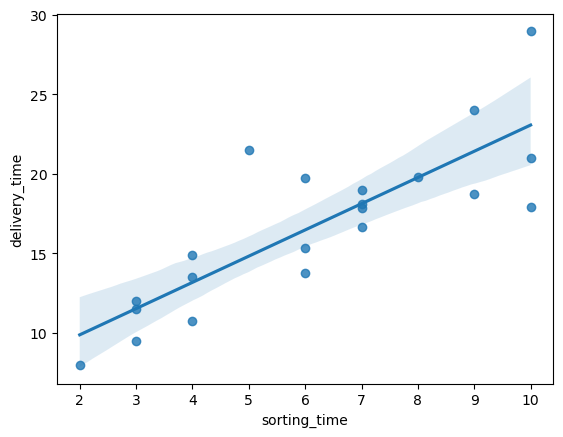

In [48]:
import seaborn as sns
sns.regplot(x=data['sorting_time'],y=data['delivery_time'])

In [32]:
data.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


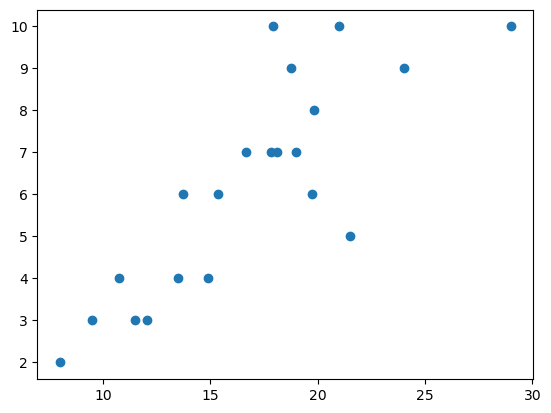

In [33]:
import matplotlib.pyplot as plt
plt.scatter(data['delivery_time'], data['sorting_time'])

# Model Building

In [24]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
model=smf.ols("delivery_time ~ sorting_time", data=data).fit()
model

In [37]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [39]:
model.tvalues

Intercept       3.823349
sorting_time    6.387447
dtype: float64

In [40]:
model.pvalues

Intercept       0.001147
sorting_time    0.000004
dtype: float64

In [41]:
#R squared values
model.rsquared

0.6822714748417231

In [50]:
model.predict(data)

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

# By Using Log Transformation

In [9]:
data['log_sorting']=np.log(data['sorting_time'])

In [10]:
data.head()

,delivery_time,sorting_time,log_sorting
0,21.00,10,2.302585
1,13.50,4,1.386294
2,19.75,6,1.791759
3,24.00,9,2.197225
4,29.00,10,2.302585


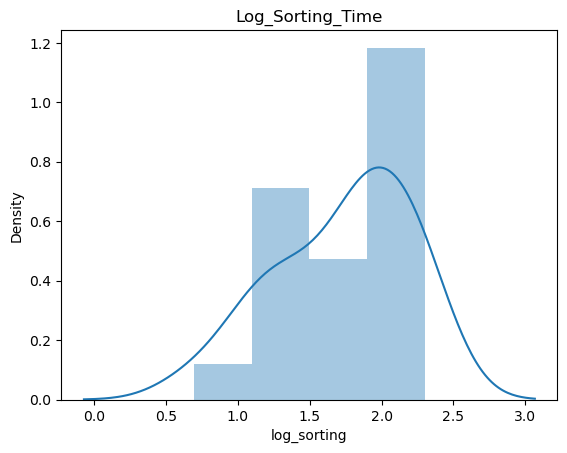

In [28]:
sns.distplot(data['log_sorting'])
plt.title("Log_Sorting_Time")
plt.show()

# Model Building by using Log transformation

In [17]:
#fitting model after transforming input variable
linear_model_1=smf.ols("delivery_time~log_sorting",data=data).fit()

In [19]:
linear_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           2.64e-06
Time:                        12:53:45   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.1597      2.455      0.472      0.642      -3.978       6.297
log_sorting     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
#parameters
linear_model_1.params

Intercept      1.159684
log_sorting    9.043413
dtype: float64

In [21]:
#t-values and p-values
print(linear_model_1.tvalues ,'\n', linear_model_1.pvalues)

Intercept      0.472460
log_sorting    6.586789
dtype: float64 
 Intercept      0.641980
log_sorting    0.000003
dtype: float64


In [22]:
#R squared values
(linear_model_1.rsquared,linear_model_1.rsquared_adj)

(0.6954434611324223, 0.6794141696130761)

# Model Selection¶
After comparing the r-square values for both the models, we can say that the linear_model_1 (Log Transformation Model) is good for our data because of high value of r-square.

Now , we can use our best model for further calculation

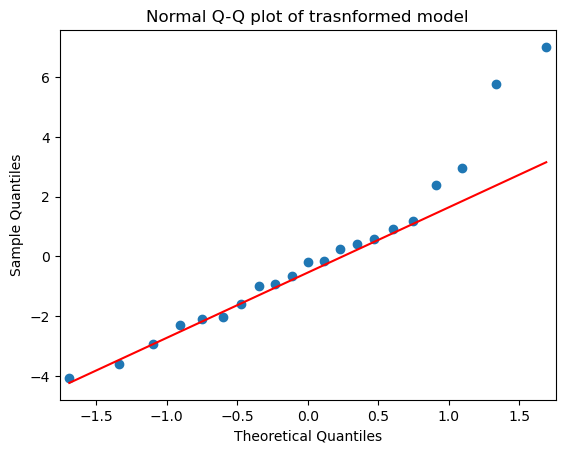

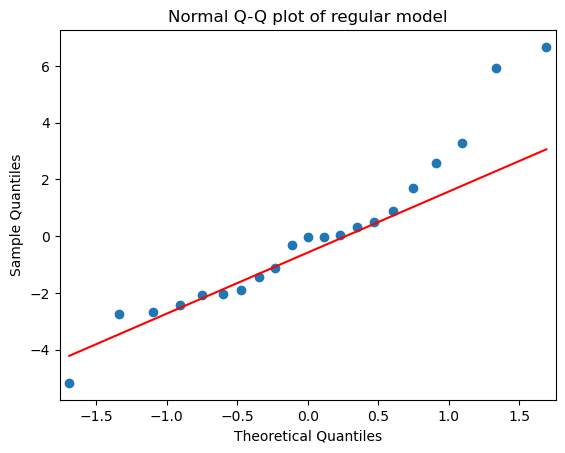

In [29]:
#Normal Q-Q Plot of Residuals for Normality For Transformed Model
sm.qqplot(linear_model_1.resid,line='q')
plt.title('Normal Q-Q plot of trasnformed model')
plt.show()

#Normal Q-Q Plot of Residuals for Normality 
sm.qqplot(model.resid,line='q')
plt.title('Normal Q-Q plot of regular model')
plt.show()

# By observing above two plots of transformed model and regular model,¶
we can say that for transformed model maximum points are lie on straight line,

hence our data follows normality condition

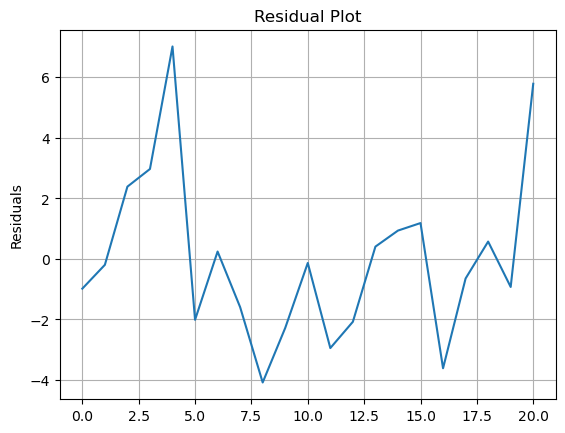

In [30]:
#Residual Plot of transformed  model
plt.plot(linear_model_1.resid)
plt.title('Residual Plot')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [31]:
pred_y=linear_model_1.fittedvalues    #predicted values
pred_y.head()

0    21.982913
1    13.696517
2    17.363305
3    21.030094
4    21.982913
dtype: float64

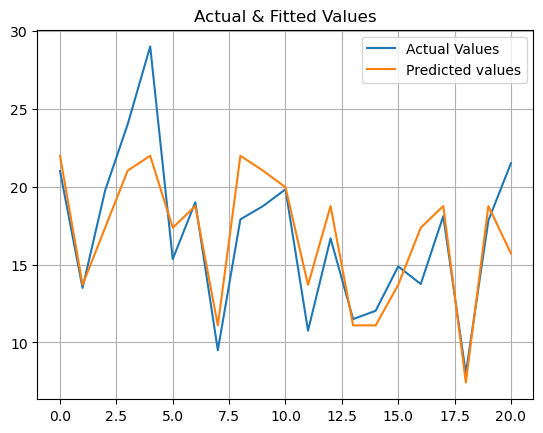

In [33]:
#plot for actual and fitted  values
plt.plot(data["delivery_time"],label='Actual Values')
plt.plot(pred_y,label='Predicted values')
plt.title('Actual & Fitted Values')
legend=plt.legend()
plt.grid(True)
plt.show()

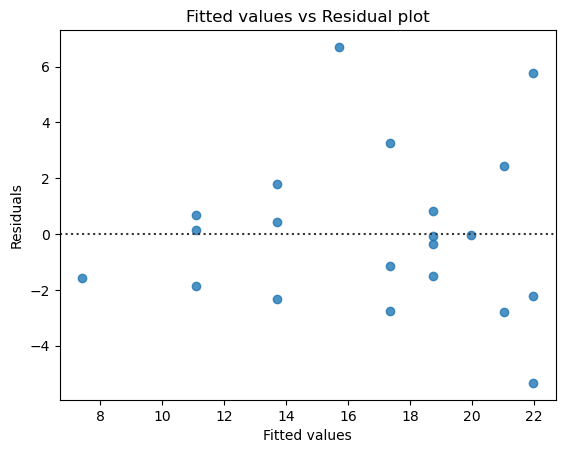

In [35]:
#Residual Vs Fitted Values Plot
sns.residplot(x=pred_y,y=model.resid)
plt.title('Fitted values vs Residual plot')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

# This plot looks good in that the variance is roughly the same all the way across and there are no worrisome patterns.there seems to be no difficulties with the model.

# Importing Salary_Data DataSet 

In [36]:
dt=pd.read_csv(r"C:\Users\DELL\Desktop\Data Science\DS Assignment\Simple Linear Regression\Salary_Data.csv")
dt

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# EDA and Data Visualization

In [53]:
dt.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [54]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [72]:
data[data.duplicated()].shape

(0, 2)

In [61]:
dt['Salary']=dt['Salary'].astype('int')

In [38]:
data=dt.rename({'YearsExperience':'years_experience', 'Salary':'salary'},axis=1)
data

,years_experience,salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


<AxesSubplot:xlabel='years_experience', ylabel='salary'>

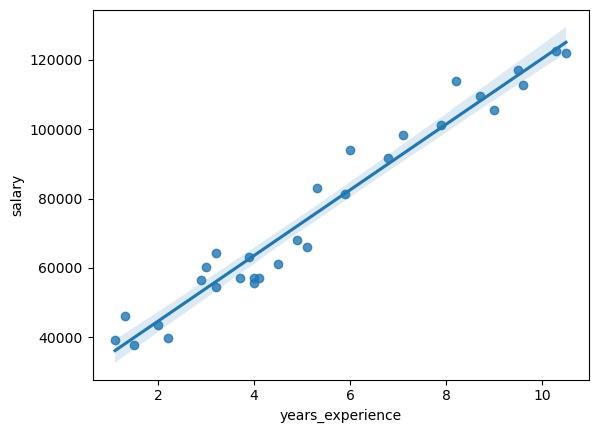

In [63]:
sns.regplot(x=data['years_experience'],y=data['salary'])

In [64]:
data.corr()

,years_experience,salary
years_experience,1.000000,0.978242
salary,0.978242,1.000000


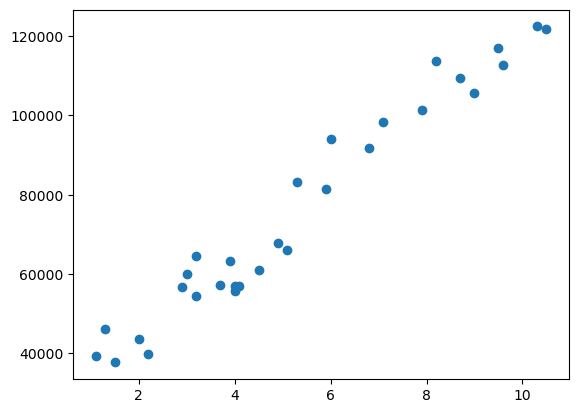

In [41]:
plt.scatter(data['years_experience'], data['salary'])

# Model Building

In [44]:
model=smf.ols("salary ~ years_experience", data=data).fit()
model

In [67]:
model.params

Intercept           25792.200199
years_experience     9449.962321
dtype: float64

In [68]:
model.tvalues

Intercept           11.346940
years_experience    24.950094
dtype: float64

In [69]:
model.pvalues

Intercept           5.511950e-12
years_experience    1.143068e-20
dtype: float64

In [70]:
model.rsquared

0.9569566641435086

# since our r-square value is 0.957¶
hence, higher r-squared indicates a better fit for the model.

In [47]:
model.predict(data)

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

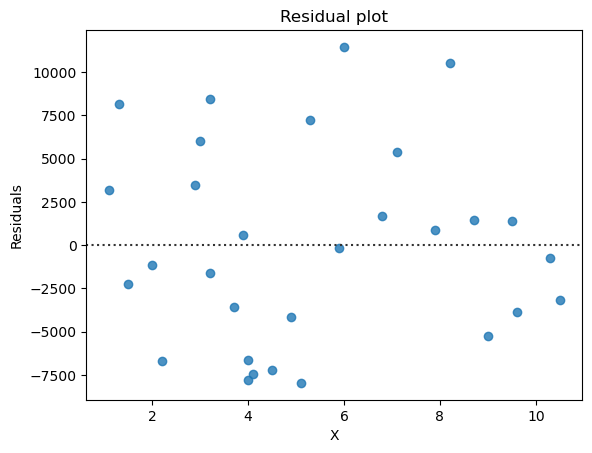

In [46]:
#Residual Plot
sns.residplot(x=data['years_experience'],y=model.resid)
plt.title('Residual plot')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.show()

# By observing the above Residual Plot, we can say that the residual plot has random pattern, that indicating a good fit for a linear model.

Now we see that what r-square value and residual plot show us for transformed equations

# By Using Different Transformations¶
1) Log Tranformation

In [48]:
data.head()

,years_experience,salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [50]:
data['log_x'] = np.log(data['years_experience'])

In [51]:
data.head()

,years_experience,salary,log_x
0,1.1,39343.0,0.095310
1,1.3,46205.0,0.262364
2,1.5,37731.0,0.405465
3,2.0,43525.0,0.693147
4,2.2,39891.0,0.788457


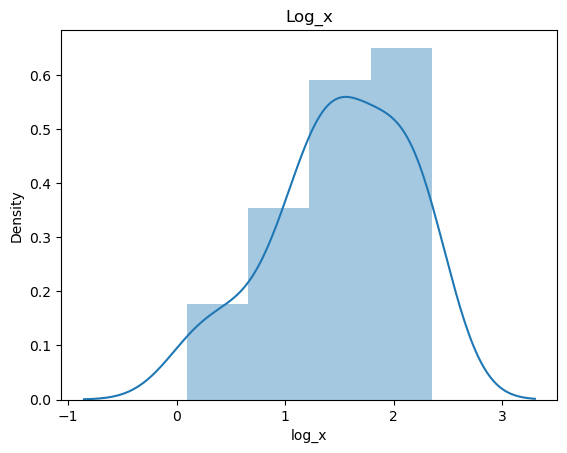

In [52]:
sns.distplot(data['log_x'])
plt.title("Log_x")
plt.show()

# Model Building || Model Training

In [53]:
model_1 = smf.ols('salary~log_x',data=data).fit()

In [54]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           3.25e-13
Time:                        13:10:04   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
log_x       4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
model_1.rsquared

0.8538888828756969

# This r-square value is less than the r-square of the model from raw data.

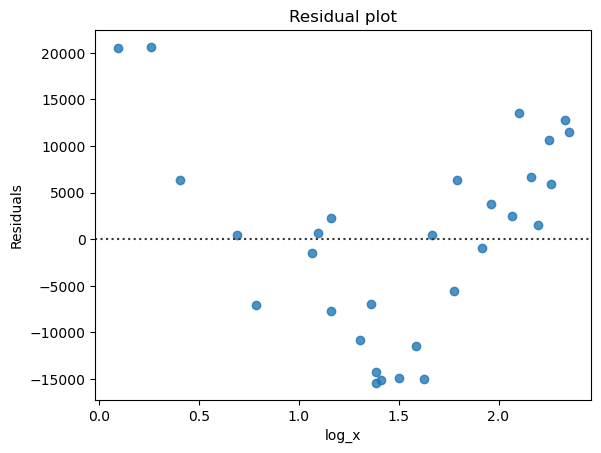

In [56]:
#Residual  Plot
sns.residplot(x=data['log_x'],y=model_1.resid)
plt.title('Residual plot')
plt.xlabel('log_x')
plt.ylabel('Residuals')
plt.show()

# The above residual plot show U-shape,which indicates our residual are Non-random.

Quadratic model (SQRT Transformation)

In [58]:
data['sqrt_x'] = np.sqrt(data['years_experience'])

In [59]:
data.head()

,years_experience,salary,log_x,sqrt_x
0,1.1,39343.0,0.095310,1.048809
1,1.3,46205.0,0.262364,1.140175
2,1.5,37731.0,0.405465,1.224745
3,2.0,43525.0,0.693147,1.414214
4,2.2,39891.0,0.788457,1.483240


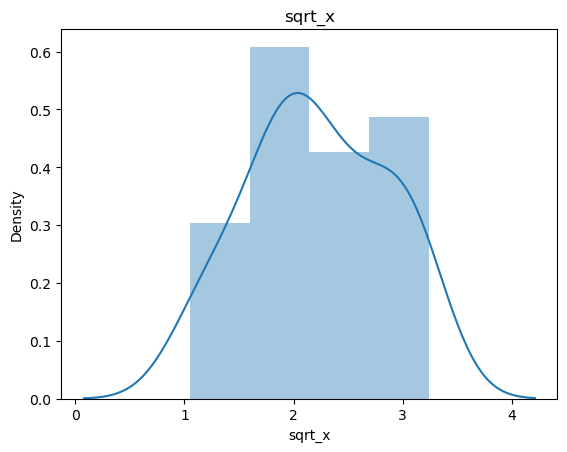

In [60]:
sns.distplot(data['sqrt_x'])
plt.title("sqrt_x")
plt.show()

# Model Building || Model Training

In [61]:
model_2 = smf.ols('salary~sqrt_x',data=data).fit()

In [62]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     377.8
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           8.57e-18
Time:                        13:13:14   Log-Likelihood:                -308.52
No. Observations:                  30   AIC:                             621.0
Df Residuals:                      28   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.606e+04   4921.599     -3.262      0.003   -2.61e+04   -5974.331
sqrt_x       4.15e+04   2135.122     19.437      0.000    3.71e+04    4.59e+04
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.638
Skew:                           0.011   Prob(JB):                        0.727
Kurtosis:                       2.286   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
model_2.rsquared

0.9310009544993526

# This r-square value is also less than the r-square of the model from raw data.

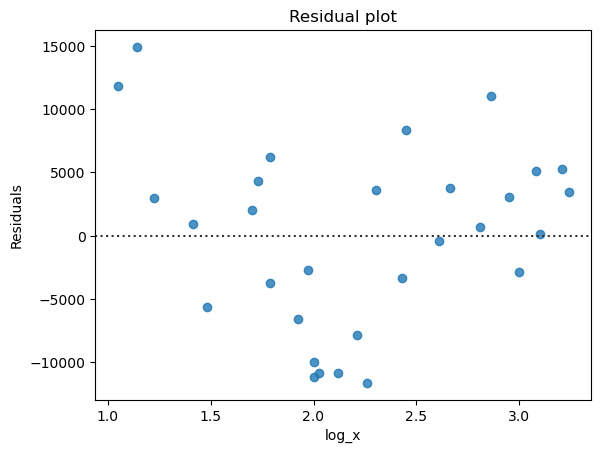

In [65]:
#Residual Plot
sns.residplot(x=data['sqrt_x'],y=model_2.resid)
plt.title('Residual plot')
plt.xlabel('log_x')
plt.ylabel('Residuals')
plt.show()

# The above residual plot show U-shape,which indicates our residual are Non-random.

3) Reciprocal model (1/y) Transformation
In this we are going to transform the dependent variable

In [66]:
data['res_proc_salary']  = 1/data['salary']

In [67]:
data.head()

,years_experience,salary,log_x,sqrt_x,res_proc_salary
0,1.1,39343.0,0.095310,1.048809,0.000025
1,1.3,46205.0,0.262364,1.140175,0.000022
2,1.5,37731.0,0.405465,1.224745,0.000027
3,2.0,43525.0,0.693147,1.414214,0.000023
4,2.2,39891.0,0.788457,1.483240,0.000025


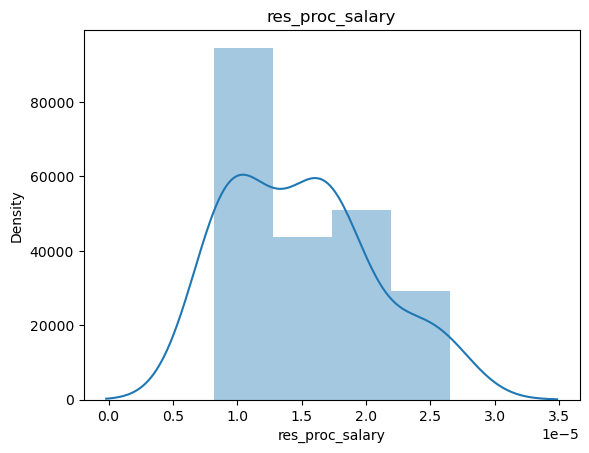

In [69]:
sns.distplot(data['res_proc_salary'])
plt.title("res_proc_salary")
plt.show()

# Model Building || Model Training

In [70]:
model_3 = smf.ols('res_proc_salary~years_experience',data=data).fit()

In [71]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        res_proc_salary   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     173.2
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           1.63e-13
Time:                        13:16:53   Log-Likelihood:                 350.83
No. Observations:                  30   AIC:                            -697.7
Df Residuals:                      28   BIC:                            -694.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2.454e-05    8.2e-07     29.913      0.000    2.29e-05    2.62e-05
years_experience -1.799e-06   1.37e-07    -13.162      0.000   -2.08e-06   -1.52e-06
==============================================================================
Omnibus:                        1.760   Durbin-Watson:                   1.137
Prob(Omnibus):                  0.415   Jarque-Bera (JB):                1.380
Skew:                           0.516   Prob(JB):                        0.502
Kurtosis:                       2.802   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
model_3.rsquared

0.8608672473082565

# This r-square value is also less than the r-square of the model from raw data.

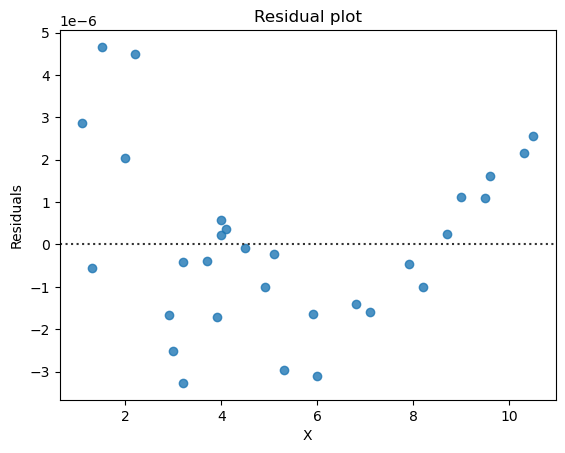

In [74]:
#Residual Plot
sns.residplot(x=data['years_experience'],y=model_3.resid)
plt.title('Residual plot')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.show()

# The above residual plot shows little bit U-shape,which indicates our residual are Non-random.

# Model Selection
Now by comparing r-square of all models,

we can say that the models which are fitted by using transformation

are not so good as compare to our model from raw data(original data)

# Hence , we select our first model for further calculation

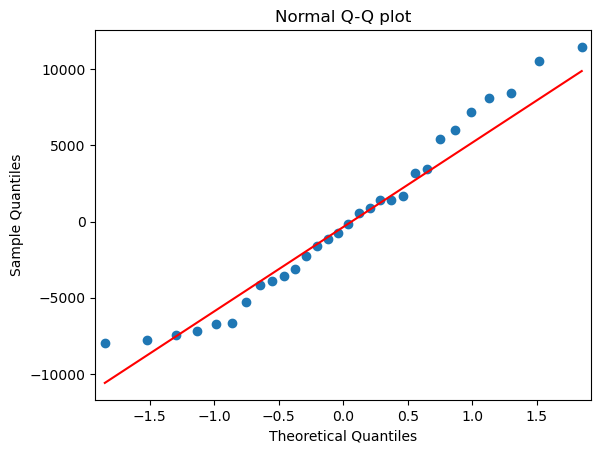

In [75]:
#Normal Q-Q Plot
sm.qqplot(model.resid,line='q')
plt.title('Normal Q-Q plot')
plt.show()

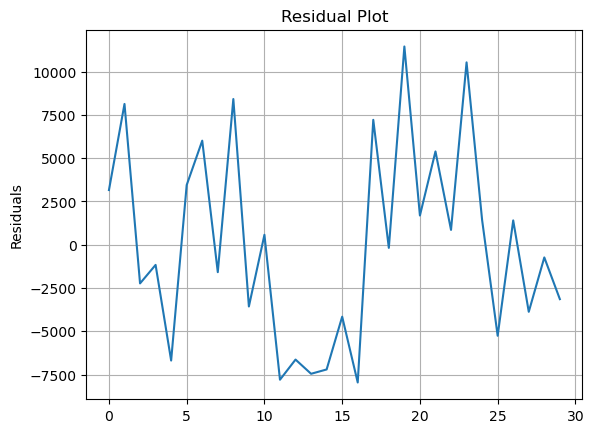

In [76]:
#Residual Plot
plt.plot(model.resid)
plt.title('Residual Plot')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [78]:
#for prediction
test_data=data['years_experience']

In [79]:
predict_y = model.predict(test_data)
print(predict_y.head())

0    36187.158752
1    38077.151217
2    39967.143681
3    44692.124842
4    46582.117306
dtype: float64


In [81]:
actual = data['salary']
actual.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: salary, dtype: float64

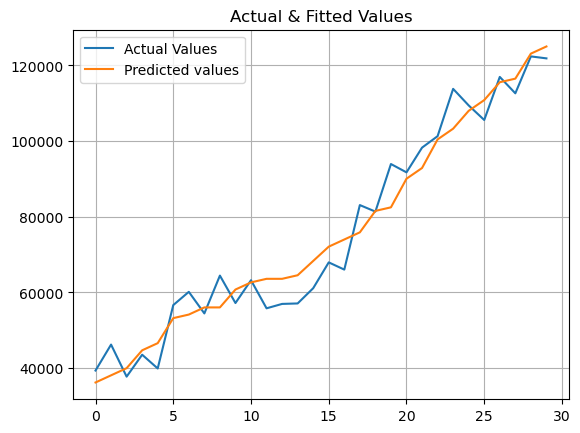

In [82]:
#plot for actual and fitted  values
plt.plot(actual,label='Actual Values')
plt.plot(predict_y,label='Predicted values')
plt.title('Actual & Fitted Values')
legend=plt.legend()
plt.grid(True)
plt.show()

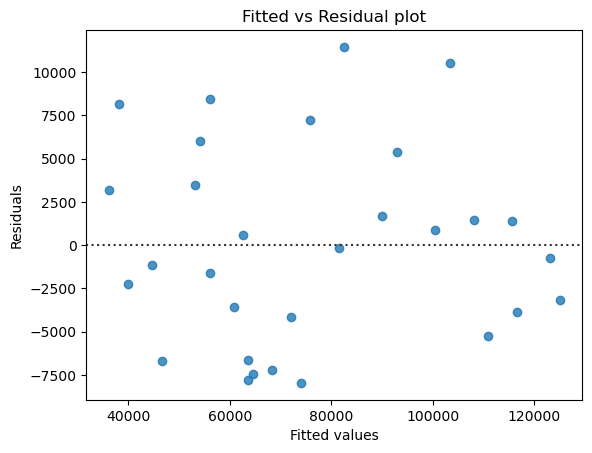

In [83]:
#Residual Vs Fitted Values Plot
sns.residplot(x=predict_y,y=model.resid)
plt.title('Fitted vs Residual plot')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

# This plot looks good in that the variance is roughly the same all the way across and there are no worrisome patterns.there seems to be no difficulties with the model.